In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import cv2
import io
import pandas as pd
import scipy
from scipy import spatial
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d
import scipy.linalg
import networkx as nx
import seaborn as sns
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.search.FCMBased import lingam 
from causallearn.utils.GraphUtils import GraphUtils
import graphviz
import lingam
from lingam.utils import make_dot
import warnings
warnings.filterwarnings('ignore')
import utils.nn_helper as helper
nn_helper = helper.NNHelper()

In [19]:
df = pd.read_csv('./data/post_manip_data/data_0_0.csv')[:9000]
x_cols = [i for i in df.columns if ('x' in i) and (i!="com_x1")]
y_cols = [i for i in df.columns if 'y' in i  and (i!="com_y1")]
# data = df[['com_x1', 'com_x2', "com_y1", "com_y2"]]
X = 1000*df[x_cols].to_numpy() #[:2000]
Y = 1000*df[y_cols].to_numpy() #[:2000]
X.shape, 

((9000, 65),)

In [20]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j] == 0:
            X[i,j] = 0.1*np.random.randn()

In [22]:
df

,com_x1,com_y1,com_x2,com_y2,robotx_0,robotx_1,robotx_2,robotx_3,robotx_4,robotx_5,...,roboty_54,roboty_55,roboty_56,roboty_57,roboty_58,roboty_59,roboty_60,roboty_61,roboty_62,roboty_63
0,0.132,-0.179,0.145031,-0.175735,0.006128,-0.021281,-0.012758,0.005676,0.004394,-0.010403,...,0.010370,-0.008148,0.018526,-0.024225,0.009802,-0.002404,0.004859,-0.005269,0.005633,0.010934
1,0.132,-0.179,0.132072,-0.178249,0.013705,-0.013871,-0.012365,0.014974,0.007526,-0.014451,...,0.015937,-0.006803,0.003849,-0.017648,-0.007534,-0.002068,0.022325,-0.023957,-0.024969,-0.023851
2,0.132,-0.179,0.130879,-0.171041,0.002477,-0.020383,0.021718,0.021087,-0.007863,0.015809,...,-0.006208,0.021021,-0.001730,0.009952,-0.001004,0.011139,0.004831,0.003861,0.021360,-0.009109
3,0.132,-0.179,0.131155,-0.178806,-0.019131,-0.014217,-0.011900,-0.006429,-0.014145,0.008239,...,0.015433,-0.003323,-0.000544,0.018418,0.006122,-0.005836,0.006270,0.018730,0.014710,-0.015017
4,0.132,-0.179,0.132284,-0.182869,-0.010738,0.015418,0.019875,0.008398,-0.018251,-0.001135,...,-0.008245,-0.024786,-0.010064,0.008035,0.020462,-0.014799,-0.016672,-0.009668,0.016695,0.020593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.132,-0.179,0.144160,-0.192843,0.012514,-0.015441,0.003454,-0.003921,-0.010975,-0.010460,...,-0.013638,-0.001943,-0.011572,0.021940,-0.021290,-0.014858,-0.010806,0.016626,-0.017967,0.013425
8996,0.132,-0.179,0.112309,-0.176443,0.011482,0.014673,-0.023974,-0.005025,-0.017514,-0.010822,...,0.002268,0.005988,-0.023791,0.023711,-0.000616,0.019945,-0.001677,-0.013204,0.018650,0.000290
8997,0.132,-0.179,0.120706,-0.187921,0.016591,0.022814,0.001041,-0.001874,0.019214,-0.015332,...,-0.012414,-0.021025,-0.018062,0.003422,-0.000060,-0.014542,-0.013218,0.010970,0.013477,-0.017685
8998,0.132,-0.179,0.137229,-0.187404,-0.014784,0.005381,-0.015458,0.009914,-0.000548,-0.012075,...,0.019623,-0.003907,0.014963,0.009225,0.016268,-0.010737,0.017337,0.023298,-0.009433,0.018466


In [23]:
""" PC """
cg = pc(Y, 0.000000000000005, 'fisherz')
cg.to_nx_graph()
nn_helper.draw_plain_graph(cg.nx_graph, scale=3)

a = np.array(cg.nx_graph.edges)[:,0]
np.vstack((a//8, a%8))

  0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

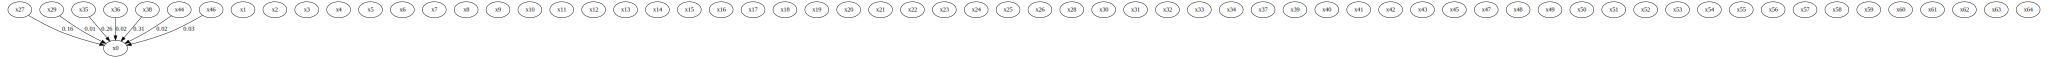

In [27]:
model = lingam.DirectLiNGAM()
model.fit(X)
# model.adjacency_matrix_[model.adjacency_matrix_<0.4] = 0
make_dot(model.adjacency_matrix_)

In [33]:
a = np.array([27,29,30,35,36,37,38,44,46])
np.vstack((a//8, a%8)).T

array([[3, 3],
       [3, 5],
       [3, 6],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 4],
       [5, 6]])

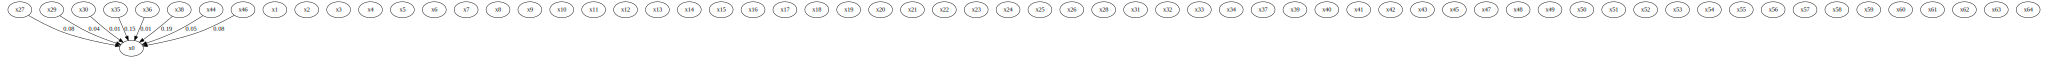

In [28]:
model = lingam.DirectLiNGAM()
model.fit(Y)
# model.adjacency_matrix_[model.adjacency_matrix_<0.4] = 0
make_dot(model.adjacency_matrix_)

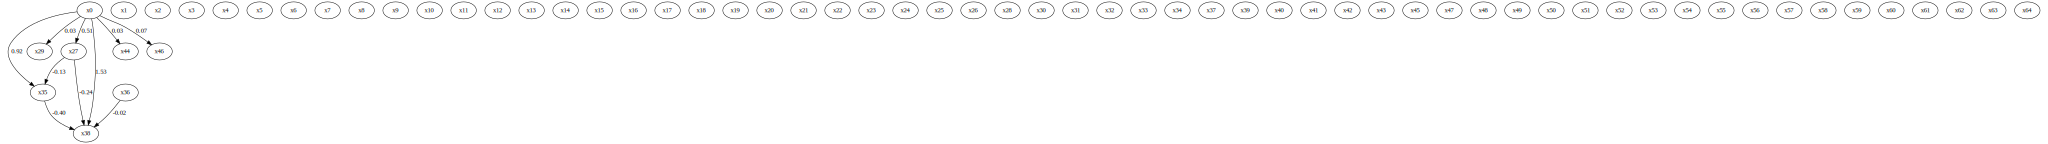

In [25]:
""" ICA LiNGAM """
model = lingam.ICALiNGAM(2, 1000)
model.fit(X)
make_dot(model.adjacency_matrix_)

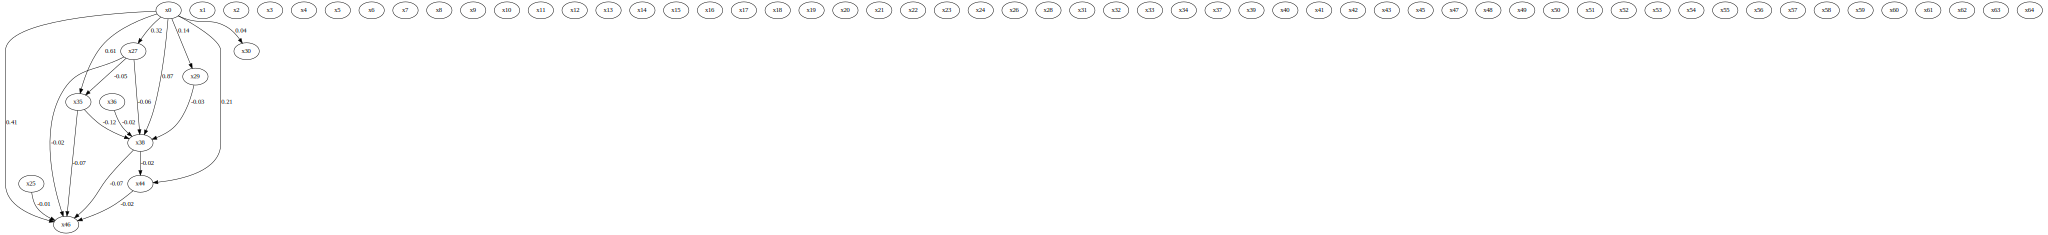

In [26]:
""" ICA LiNGAM """
model = lingam.ICALiNGAM(2, 1000)
model.fit(Y)
make_dot(model.adjacency_matrix_)